In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

## Task 1

#### part a

In [2]:
train_set = pd.read_csv('trainingSet.csv')
test_set = pd.read_csv('testingSet.csv')

In [3]:
train_set.head(2)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1


In [4]:
test_set.head(2)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,1,5,0,1,3,2,1,18,30,50,13,12,24,1
1,0,1,0,0,1,1,1,10,10,12,10,6,16,-1


#### part b

In [5]:
train_set['DEFECTIVE'].value_counts()

 1    182
-1    182
Name: DEFECTIVE, dtype: int64

In [6]:
test_set['DEFECTIVE'].value_counts()

 1    68
-1    68
Name: DEFECTIVE, dtype: int64

#### part  c

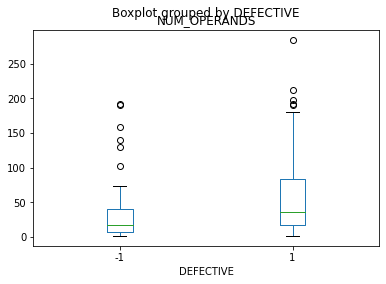

In [25]:
train_set.boxplot(by ='DEFECTIVE', column =['NUM_OPERANDS'], grid = False) 

#### part d

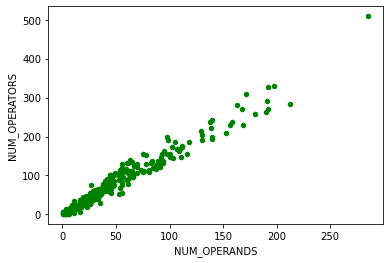

In [24]:
ax1 = train_set.plot.scatter(x='NUM_OPERANDS',
                      y='NUM_OPERATORS',
                      c='Green')

#### part e

In [9]:
# y = train_set[['DEFECTIVE']]
# x = train_set.drop(['DEFECTIVE'], axis=1)
x = train_set.iloc[:, 0:13].values
y = train_set.iloc[:, 13].values

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.55, random_state=42)

In [11]:
X_train.size

2119

In [12]:
X_val.size

2613

## Task 2

#### part a

In [13]:
# PCA
from sklearn.decomposition import PCA
"""pca = PCA(n_components = None)"""
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

#### part b

In [14]:
explained_variance

array([9.58947064e-01, 2.83532450e-02, 5.77417813e-03, 2.97145368e-03,
       1.36490288e-03, 1.22173757e-03, 4.93509934e-04, 3.91173032e-04,
       2.82643597e-04, 1.13389420e-04, 5.55616091e-05, 2.44783413e-05,
       6.66324422e-06])

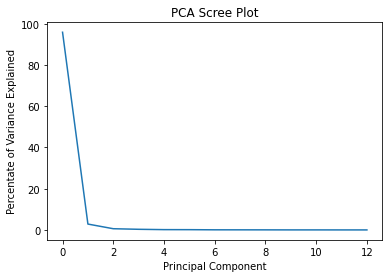

In [15]:
percent_variance = np.round(explained_variance* 100, decimals =2)
plt.plot(percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

#### part c

In [16]:
X_test = test_set.iloc[:, 0:13].values
y_test = test_set.iloc[:, 13].values
X_test = pca.transform(X_test)

#### part d

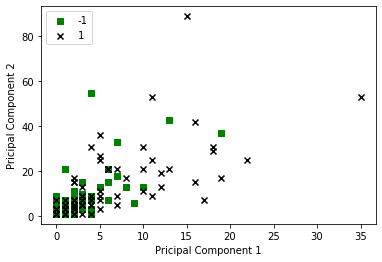

In [30]:
X_train_pca_2 = X_train[:,:2]

colors = ['g', 'k']
markers = ['s', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca_2[y_train==l, 0], 
                X_train_pca_2[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('Pricipal Component 1')
plt.ylabel('Pricipal Component 2')
plt.legend(loc='upper left')
plt.show()

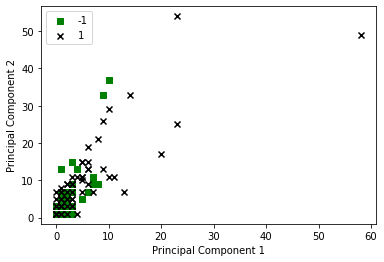

In [32]:
X_test_pca_2 = X_test[:,:2]

colors = ['g', 'k']
markers = ['s', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_test_pca_2[y_test==l, 0], 
                X_test_pca_2[y_test==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.show()

## Task 3

In [19]:
train_set = pd.read_csv('trainingSet.csv')
test_set = pd.read_csv('testingSet.csv')

X_train = train_set.iloc[:, 0:13].values
y_train = train_set.iloc[:, 13].values

X_test = test_set.iloc[:, 0:13].values
y_test = test_set.iloc[:, 13].values

In [20]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 61.76470588235294


#### Task 4

#### part a

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.55, random_state=42)

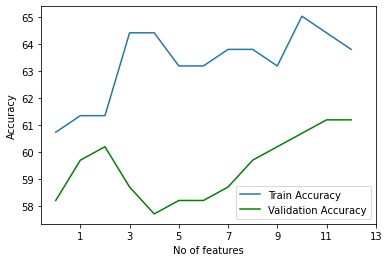

In [33]:
k_range = range(1, 14)
train_accuracy = []
val_accuracy = []
for k in k_range:
    clf = GaussianNB()
    clf.fit(X_train[:,:k], y_train)
    y_train_pred = clf.predict(X_train[:,:k])
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred) * 100)
    y_val_pred = clf.predict(X_val[:,:k])
    val_accuracy.append(metrics.accuracy_score(y_val, y_val_pred) * 100)
    


plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, 'g', label="Validation Accuracy")
plt.legend()
plt.xticks([1,3,5,7,9,11,13])
plt.xlabel("No of features")
plt.ylabel("Accuracy")
plt.show()

#### part b

The Number I will choose is 13 because of its accuracy it is best in validation set that is hidden in model. This mean that this will perform well on unseen data when the number of features is 13.

#### part c

In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 59.55882352941176


## Task 5

To predict the outcome based on various feature whether the defect is there or not. The model was developed using naive bayes algorithm. The classifier was initaited using its default parameters. After training and testing the model, it got an accuracy of about 60%. The accuracy can be improved using more data points. The impact of accuracy was noted by changing the number of features and training it on same dataset. There was little impact of it on accuracy which can be increased by adding more data points to the dataset and retraining it again.